In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\14 Decision Tree\Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.skew()

C:\Users\prajw\AppData\Local\Temp\ipykernel_23428\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [7]:
df.kurt()

C:\Users\prajw\AppData\Local\Temp\ipykernel_23428\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [8]:
df1=pd.get_dummies(df,columns=["Undergrad","Marital.Status","Urban"])

In [9]:
corr=df1.corr()

<AxesSubplot:>

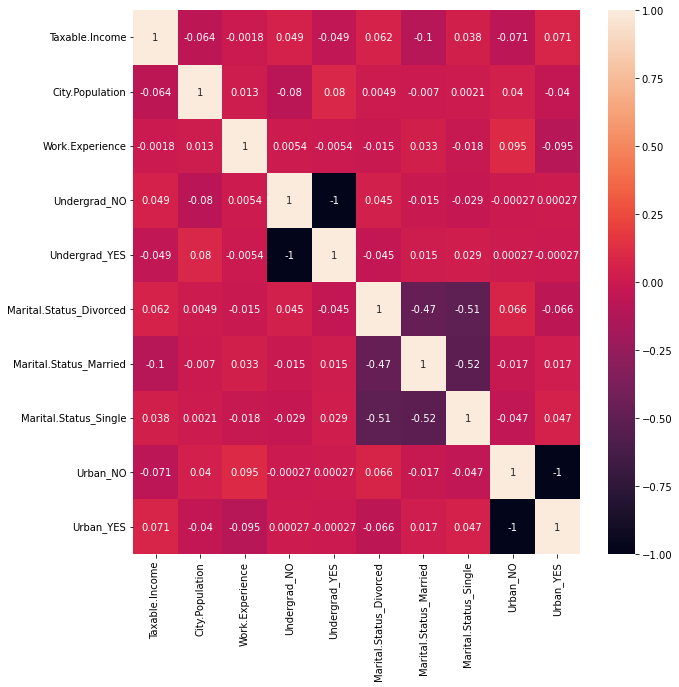

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [11]:
#df2=df.copy()

In [12]:
#df2["Undergrad"]=df2["Undergrad"].map({"YES":1,"NO":0})
#df2["Urban"]=df2["Urban"].map({"YES":1,"NO":0})

In [13]:
#df02=pd.get_dummies(df2,columns=["Marital.Status"])

In [14]:
#corr1=df02.corr()

In [15]:
#plt.figure(figsize=(10,10))
#sns.heatmap(corr1,annot=True)

In [16]:
df1["Taxable.Income"]=pd.cut(df1["Taxable.Income"],bins=(0,30000,1000000),labels=['Risky','Good'])

In [17]:
df1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [18]:
x=df1.iloc[:,1:]
y=df1.iloc[:,:1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [21]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [74]:
dtc=DecisionTreeClassifier(criterion="entropy")

In [75]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
pred=dtc.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [78]:
accuracy_score(y_test,pred)

0.6416666666666667

In [79]:
confusion_matrix(y_test,pred)

array([[72, 21],
       [22,  5]], dtype=int64)